<a href="https://colab.research.google.com/github/jettecampbell/data-science/blob/main/JettCampU7proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Turnovers in Basketball

For this project, I wanted to determine which statistics play the biggest factor to a player's total turnovers in a NBA season. A turnover in basketball is counted anytime a player gives up the ball to the other team, whether it be stolen, out of bounds, or by a foul. My initial prediction are that offensive stats that give up the ball without turnovers such as assists to teammates or a made shot would decrease the amount of turnovers. Additionally, minutes played should be the greatest factor as more play time will ultimately lead to more turnovers.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
bball = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv')

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-e3a_dc3b
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-e3a_dc3b
  Resolved https://github.com/pydata/xarray.git to commit 0184702f16c3f744fc9096c7dac690626dcc6922
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev22+g0184702f-py3-none-any.whl size=1262235 sha256=ddadc2093df0302212304e4b2a7872a0947594042d5d3e4b1f334bb7977f3a66
  Stored in directory: /tmp/pip-ephem-wheel-cache-dav0n2gv/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 4.2 MB/s eta 0:00:00
   ━

## Matrix

This part is a little unnessecary, but I wanted to try creating a matrix of all the variables relation to one another to see if any stood out for turnovers.

In [ ]:
#condenses the variables down slightly just so there aren't as many matrix graphs
bball=bball[['MP','FG','FGA','FG%','3P','3PA','3P%','FT','FTA','FT%','ORB','DRB','AST','STL','BLK','TOV','PF','PTS']]

array([[<Axes: xlabel='MP', ylabel='MP'>,
        <Axes: xlabel='FG', ylabel='MP'>,
        <Axes: xlabel='FGA', ylabel='MP'>,
        <Axes: xlabel='FG%', ylabel='MP'>,
        <Axes: xlabel='3P', ylabel='MP'>,
        <Axes: xlabel='3PA', ylabel='MP'>,
        <Axes: xlabel='3P%', ylabel='MP'>,
        <Axes: xlabel='FT', ylabel='MP'>,
        <Axes: xlabel='FTA', ylabel='MP'>,
        <Axes: xlabel='FT%', ylabel='MP'>,
        <Axes: xlabel='ORB', ylabel='MP'>,
        <Axes: xlabel='DRB', ylabel='MP'>,
        <Axes: xlabel='AST', ylabel='MP'>,
        <Axes: xlabel='STL', ylabel='MP'>,
        <Axes: xlabel='BLK', ylabel='MP'>,
        <Axes: xlabel='TOV', ylabel='MP'>,
        <Axes: xlabel='PF', ylabel='MP'>,
        <Axes: xlabel='PTS', ylabel='MP'>],
       [<Axes: xlabel='MP', ylabel='FG'>,
        <Axes: xlabel='FG', ylabel='FG'>,
        <Axes: xlabel='FGA', ylabel='FG'>,
        <Axes: xlabel='FG%', ylabel='FG'>,
        <Axes: xlabel='3P', ylabel='FG'>,
        <Axes: xla

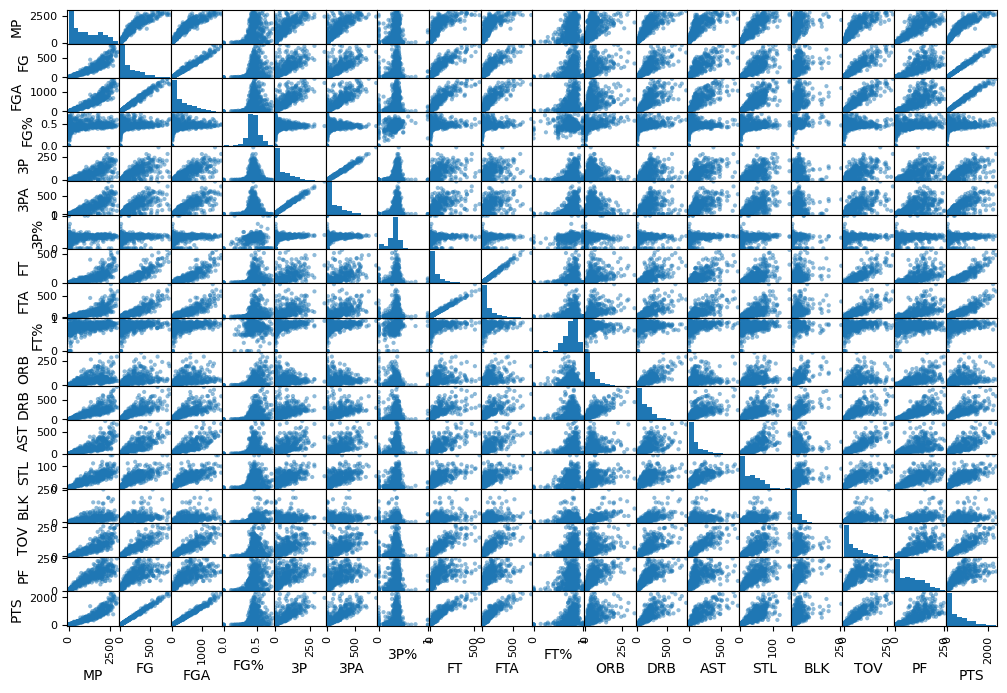

In [ ]:
pd.plotting.scatter_matrix(bball, figsize=(12, 8))

## Scatter Plots

Here I take the variables I believe most correlate with turnovers and compare them with scatterplots. As you can see, all of them show a pretty strong correlation, but its also because both turnovers and the rest of the variables are highly factored by minutes played.

<Axes: xlabel='AST', ylabel='TOV'>

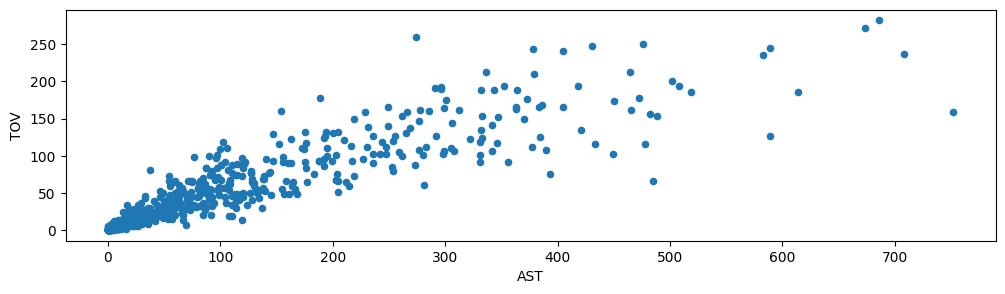

In [ ]:
#Assists vs Turnovers
bball.plot(x="AST", y="TOV", figsize=(12, 3), kind="scatter")

<Axes: xlabel='ORB', ylabel='TOV'>

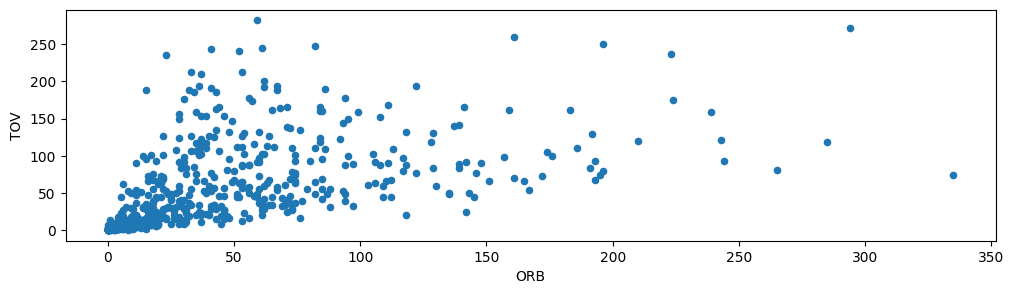

In [ ]:
#Offensive Rebounds vs Turnovers
bball.plot(x="ORB", y="TOV", figsize=(12, 3), kind="scatter")

<Axes: xlabel='FG', ylabel='TOV'>

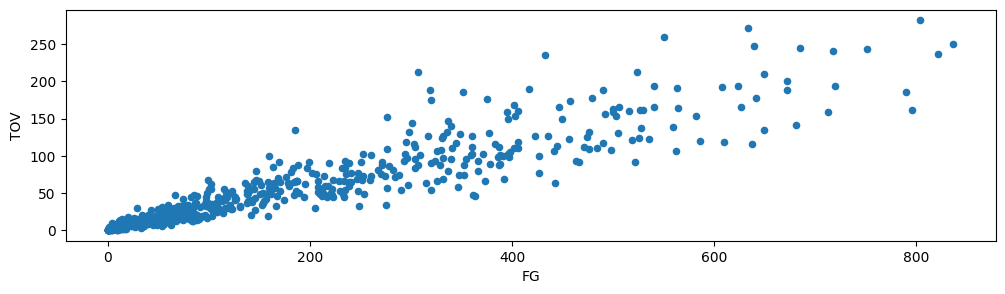

In [ ]:
#Field Goals vs Turnovers
bball.plot(x="FG", y="TOV", figsize=(12, 3), kind="scatter")

<Axes: xlabel='PF', ylabel='TOV'>

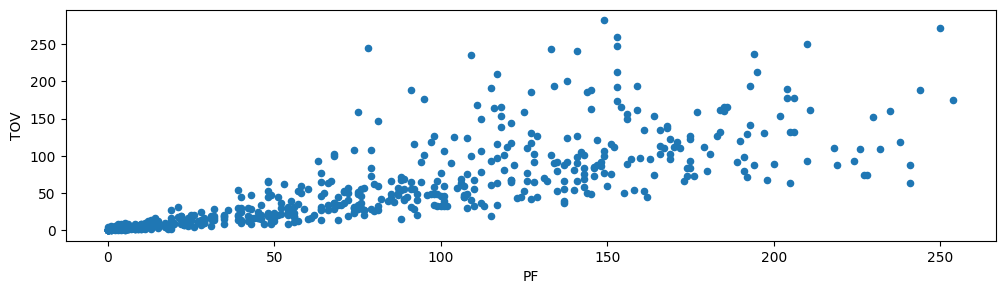

In [ ]:
#Personal Fouls vs Turnovers
bball.plot(x="PF", y="TOV", figsize=(12, 3), kind="scatter")

<Axes: xlabel='MP', ylabel='TOV'>

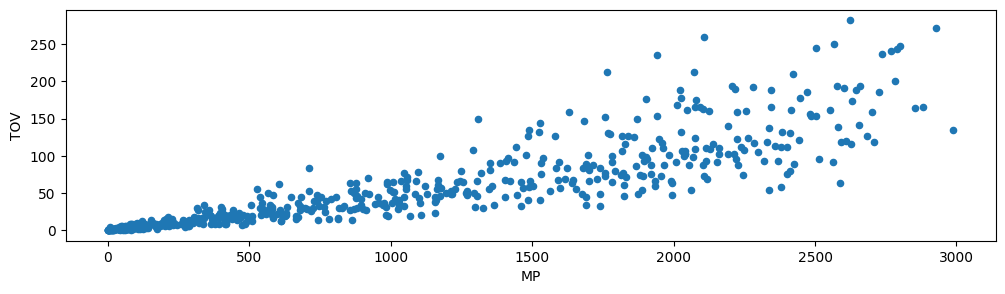

In [ ]:
#Minutes Played vs Turnovers
bball.plot(x="MP", y="TOV", figsize=(12, 3), kind="scatter")

## Models

At this point, I knew which variables work best to predict turnovers, but I wasn't sure which model would work best, so I tried a bunch of different types.

First I tried simple polynomials to varying degrees using minutes played and turn overs. Polynomials are efficient and work well with linear relationships while also allowing flexibility in degree selection. The trend lines created turn out very smooth and can match those of straightfoward relationships.

In [ ]:
#One degree polynomial
model_poly_1 = bmb.Model("TOV ~ MP", bball)
idata_poly_1 = model_poly_1.fit()

Output()

In [ ]:
#Three degree polynomial
model_poly_3 = bmb.Model("TOV ~ poly(MP, degree=3)", bball)
idata_poly_3 = model_poly_3.fit()

Output()

In [ ]:
#Five degree polynomial
model_poly_5 = bmb.Model("TOV ~ poly(MP, degree=5)", bball)
idata_poly_5 = model_poly_5.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


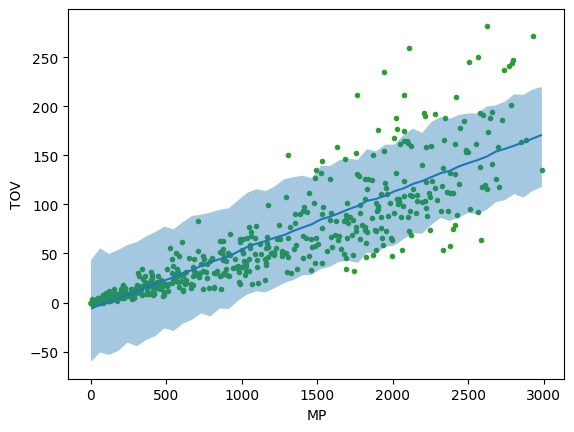

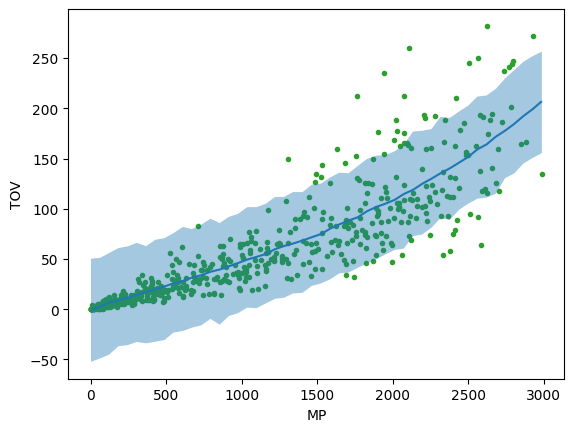

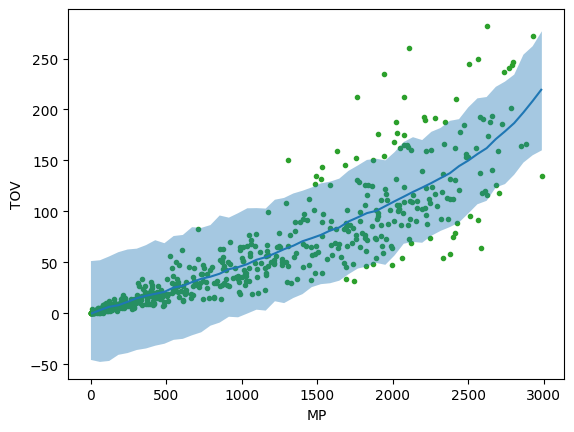

In [ ]:
#Plots the models
bmb.interpret.plot_predictions(model_poly_1, idata_poly_1, "MP", pps=True)
plt.plot(bball.MP, bball.TOV, "C2.", zorder=-3)

bmb.interpret.plot_predictions(model_poly_3, idata_poly_3, "MP", pps=True)
plt.plot(bball.MP, bball.TOV, "C2.", zorder=-3)

bmb.interpret.plot_predictions(model_poly_5, idata_poly_5, "MP", pps=True)
plt.plot(bball.MP, bball.TOV, "C2.", zorder=-3)

These models turned out pretty good and predicted turnovers pretty closely.


The first degree polynomial shows just a straight line hitting most of the data points. However, once it starts getting higher in minutes played, the points go off track a bit and collect in the top right corner.

The third degree polynomial fixes this by slightly curving upward, covering some more of the data that strays from the center.

The fifth degree polynomial curves even more, leaving out more of the data points under the line. This model, while hitting the higher points a little better, leaves out some more of the lower points.


Overall I believe the third degree works the best here.

In [ ]:
#Makes models compatiable to compare
idata_poly_1 = model_poly_1.fit(idata_kwargs={"log_likelihood":True})
idata_poly_3 = model_poly_3.fit(idata_kwargs={"log_likelihood":True})
idata_poly_5 = model_poly_5.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Next, I tried b-spline models with varying knots. These models break data into piecewise polynomial segments, reducing overfitting. Additioanlly, careful knot selection is important as too few knots lead to underfitting, while too many lead to high variance.

In [36]:
num_knots = 3
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline_3 = bmb.Model("TOV ~ bs(MP, degree=3, knots=knots)", bball, family="negativebinomial")
idata_spline_3 = model_spline_3.fit()

Output()

In [37]:
num_knots = 6
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline_6 = bmb.Model("TOV ~ bs(MP, degree=3, knots=knots)", bball, family="negativebinomial")
idata_spline_6 = model_spline_6.fit()

Output()

In [38]:
num_knots = 9
knots = np.linspace(0, 23, num_knots+2)[1:-1]
model_spline_9 = bmb.Model("TOV ~ bs(MP, degree=3, knots=knots)", bball, family="negativebinomial")
idata_spline_9 = model_spline_9.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


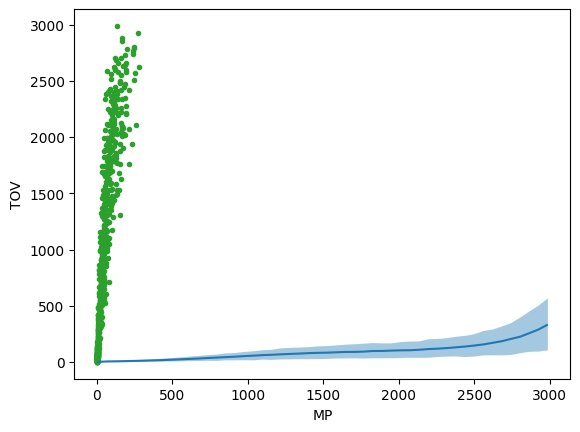

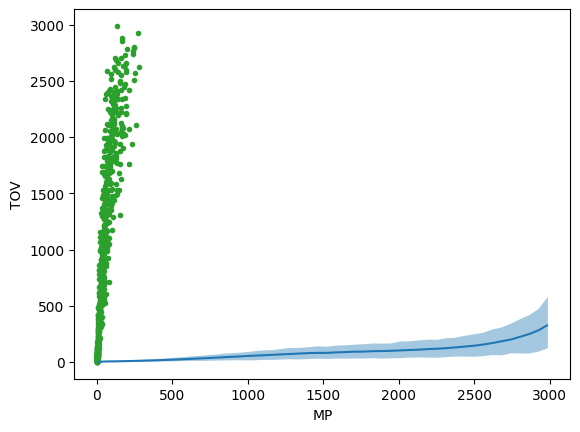

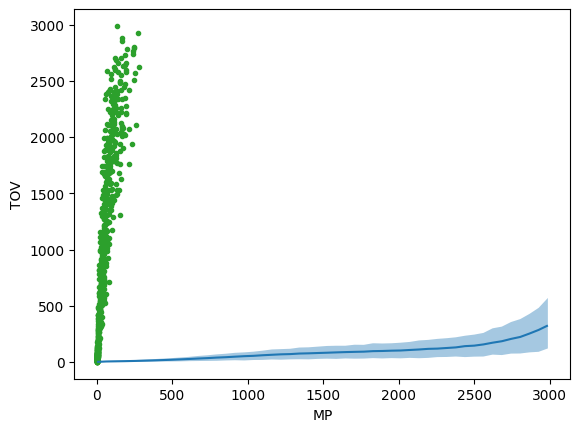

In [39]:
bmb.interpret.plot_predictions(model_spline_3, idata_spline_3, "MP", pps= True)
plt.plot(bball.TOV, bball.MP, "C2.", zorder=-3)
bmb.interpret.plot_predictions(model_spline_6, idata_spline_6, "MP", pps= True)
plt.plot(bball.TOV, bball.MP, "C2.", zorder=-3)
bmb.interpret.plot_predictions(model_spline_9, idata_spline_9, "MP", pps= True)
plt.plot(bball.TOV, bball.MP, "C2.", zorder=-3)

The trend line of these models all look very similar regardless of knot amount, and go very off track of the actual data.

In [42]:
idata_spline_3 = model_spline_3.fit(idata_kwargs={"log_likelihood":True})
idata_spline_6 = model_spline_6.fit(idata_kwargs={"log_likelihood":True})
idata_spline_9 = model_spline_9.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

Output()

Finally, I tried bambi models to factor in all the different offensive stats to predict turnovers. I did both a basic model and an interaction model with minutes played factoring every variable because more time leads to more opportunities.

Assists - Players who frequently assist tend to have higher turnovers because they take more risks with passing. Playmakers handle the ball more often, increasing the chance of errant or intercepted passes.

Offensive Rebounds - Players who aggressively go for offensive rebounds may turn the ball over when trying to pass out of traffic, getting stripped by defenders, or committing fouls. However, they typically have lower turnover rates than primary ball handlers.

Personal Fouls - A player in foul trouble may play more cautiously, reducing aggressive ball movement and thus lowering turnovers. However, offensive fouls directly contribute to turnovers.

Field Goals - Players who attempt and make more shots tend to have higher turnovers since they handle the ball frequently. However, efficient scorers may have lower turnovers if they focus on high-percentage shots rather than risky plays.

In [ ]:
model_main = bmb.Model("TOV ~ AST + ORB + PF + FG + MP",
                       data=bball).fit(idata_kwargs={"log_likelihood": True})

Output()

In [ ]:
model_interactions = bmb.Model("TOV ~ AST + ORB + PF + FG + MP + AST*MP + ORB*MP + PF*MP + FG*MP",
                       data=bball).fit(idata_kwargs={"log_likelihood": True})

Output()

Now, I have to compare all the models together to see which one really works the best. My prediciton is the interaction model since minutes played is a key factor in turnovers and all of the other factor variables.

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

              rank     elpd_loo      p_loo   elpd_diff    weight         se  \
B-Spline 9       0 -2226.103578  13.166067    0.000000  0.435898  34.688110   
B-Spline 6       1 -2226.485460  11.453083    0.381882  0.173265  34.641866   
B-Spline 3       2 -2231.887284   7.776495    5.783705  0.075103  34.273441   
Main             3 -2421.180323  18.646915  195.076745  0.171199  38.570501   
Interactions     4 -2424.088055  25.799864  197.984477  0.144534  38.336486   
Degree 3         5 -2698.848921   9.961871  472.745342  0.000000  32.029117   
Degree 5         6 -2701.886571  14.561224  475.782992  0.000000  32.439586   
Degree 1         7 -2713.072377   6.141999  486.968798  0.000000  31.196804   

                    dse  warning scale  
B-Spline 9     0.000000     True   log  
B-Spline 6     2.138252     True   log  
B-Spline 3     4.893620    False   log  
Main          39.493652    False   log  
Interactions  39.502354     True   log  
Degree 3      30.745108    False   log  
D

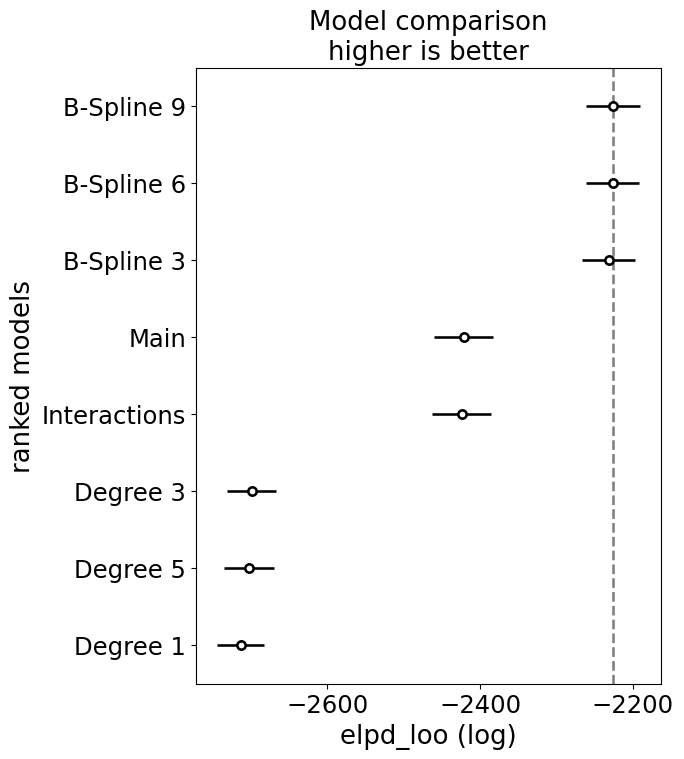

In [43]:
compare = az.compare(
    {
        "Degree 1": idata_poly_1,
        "Degree 3": idata_poly_3,
        "Degree 5": idata_poly_5,
        "B-Spline 3": idata_spline_3,
        "B-Spline 6": idata_spline_6,
        "B-Spline 9": idata_spline_9,
        "Main": model_main,
        "Interactions": model_interactions
    },
)

print(compare)
az.plot_compare(compare)
plt.show()

Comparing the elpd_loos of the models shows B-splines predcit the turnovers best using minutes played. I'm suprised these models performed best as the scatter plots look very off, but there is more to it. They likely worked best because of the knots allowing smooth transitions of polynomial segments with higher minutes played and turn overs. From this I learned that while minutes played factor primarily with a lower threshold, once it gets to higher values its more on a player-to-player basis so minutes played doesnt play as big of a role.